In [31]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pylab as py
import seaborn as sns
import json
import urllib
from bs4 import BeautifulSoup
from pylab import rcParams

%matplotlib inline
sns.set(style="ticks")
matplotlib.style.use('ggplot')

In [64]:
logs_path = './result/log/'
df = pd.DataFrame(columns=['Delta1', 'Delta2', 'Node', 'PPN'])
for filename in os.listdir(logs_path):
    full_path = logs_path + '/' + filename
    tokenized = filename.split('_')
    df_t = pd.read_csv(full_path, names=['Delta1', 'Delta2'])
    df_t['Node'] = tokenized[1]
    df_t['PPN'] = tokenized[3].split('.')[0]
    
    df = df.append(df_t, ignore_index=True)

In [81]:
df = df.apply(pd.to_numeric, errors='ignore')
df['NxP'] = df.Node * df.PPN

In [82]:
df

Delta1    Delta2  Node  PPN  NxP
0     3.40170   32.0473     1    1    1
1     3.92932   20.1917     1    2    2
2     4.40824   16.2706     1    3    3
3     4.87817   14.7498     1    4    4
4     5.37333   13.8271     1    5    5
5     5.86931   13.5531     1    6    6
6     6.37917   13.5652     1    7    7
7     6.86747   13.6126     1    8    8
8     3.39904   32.0394     2    1    2
9     7.94759   14.7425     2   10   20
10    8.34522   15.2475     2   11   22
11    8.84521   15.8622     2   12   24
12    9.35105   16.3910     2   13   26
13    9.85134   17.1319     2   14   28
14   10.34770   17.5084     2   15   30
15   10.83220   18.0084     2   16   32
16    3.90069   20.1781     2    2    4
17    4.39818   16.2604     2    3    6
18    4.86541   14.6299     2    4    8
19    5.37563   14.0549     2    5   10
20    5.86579   13.5917     2    6   12
21    6.38226   13.5275     2    7   14
22    6.86749   13.6183     2    8   16
23    7.39190   14.1630     2    9   18
24    3.38574   32.0524     3    1    3
25    7.85112   14.7295     3   10   30
26    8.35796   15.1986     3   11   33
27    8.84212   15.8679     3   12   36
28    9.34415   16.3889     3   13   39
29    9.83012   16.9068     3   14   42
..        ...       ...   ...  ...  ...
54    3.90113   20.1841     4    2    8
55   49.57670  171.5570     4   20   80
56  103.49800  242.1230     4   21   84
57    4.41177   16.2761     4    3   12
58    4.86743   14.6210     4    4   16
59    5.38727   13.8309     4    5   20
60    5.87157   13.5585     4    6   24
61    6.36710   13.4679     4    7   28
62    6.85705   14.4212     4    8   32
63    7.35414   14.1158     4    9   36
64    3.40011   32.0394     5    1    5
65    7.88084   14.9943     5   10   50
66    8.36006   15.2893     5   11   55
67    8.83563   15.8188     5   12   60
68    9.45325   16.4218     5   13   65
69    9.86033   16.9839     5   14   70
70   11.49110   18.6429     5   15   75
71   10.84680   18.0745     5   16   80
72   11.35640   18.5933     5   17   85
73   12.47520   19.8855     5   19   95
74    3.88027   20.1684     5    2   10
75   49.13950  160.8050     5   20  100
76  103.62100  240.4570     5   21  105
77    5.04355   16.9032     5    3   15
78    4.86958   14.6189     5    4   20
79    5.37796   13.9168     5    5   25
80    5.87961   13.5335     5    6   30
81    6.35974   13.5943     5    7   35
82    6.85938   13.7592     5    8   40
83    7.36330   14.0841     5    9   45

[84 rows x 5 columns]

In [99]:
df_g = df.groupby('NxP').mean().reset_index()

In [106]:
df_g

NxP      Delta1      Delta2      Node        PPN
0     1    3.401700   32.047300  1.000000   1.000000
1     2    3.664180   26.115550  1.500000   1.500000
2     3    3.896990   24.161500  2.000000   2.000000
3     4    4.058937   22.322267  2.333333   2.333333
4     5    4.386720   22.933250  3.000000   3.000000
5     6    4.724117   16.668900  2.000000   3.666667
6     7    6.379170   13.565200  1.000000   7.000000
7     8    5.211337   16.142200  2.333333   4.666667
8     9    4.412020   16.276700  3.000000   3.000000
9    10    4.627950   17.111650  3.500000   3.500000
10   12    5.048310   14.827133  3.000000   4.333333
11   14    6.382260   13.527500  2.000000   7.000000
12   15    5.210290   15.355900  4.000000   4.000000
13   16    5.867460   14.119650  3.000000   6.000000
14   18    6.631155   13.859900  2.500000   7.500000
15   20    6.068147   14.397433  3.666667   6.333333
16   21    6.360340   13.427300  3.000000   7.000000
17   22    8.345220   15.247500  2.000000  11.000000
18   24    7.190900   14.368367  3.000000   8.666667
19   25    5.377960   13.916800  5.000000   5.000000
20   26    9.351050   16.391000  2.000000  13.000000
21   27    7.360550   14.147400  3.000000   9.000000
22   28    8.109220   15.299900  3.000000  10.500000
23   30    8.026143   15.257133  3.333333  10.333333
24   32    8.844625   16.214800  3.000000  12.000000
25   33    8.357960   15.198600  3.000000  11.000000
26   35    6.359740   13.594300  5.000000   7.000000
27   36    8.098130   14.991850  3.500000  10.500000
28   39    9.344150   16.388900  3.000000  13.000000
29   40    7.363765   14.257800  4.500000   9.000000
30   42    9.830120   16.906800  3.000000  14.000000
31   44    8.563410   15.466400  4.000000  11.000000
32   45    8.910300   15.849500  4.000000  12.000000
33   48    9.839220   16.931450  3.500000  14.000000
34   50    7.880840   14.994300  5.000000  10.000000
35   51   11.328100   18.580700  3.000000  17.000000
36   52    9.354230   16.365800  4.000000  13.000000
37   55    8.360060   15.289300  5.000000  11.000000
38   56    9.862970   17.032900  4.000000  14.000000
39   57   12.578700   19.993700  3.000000  19.000000
40   60   23.222143   58.239633  4.000000  15.666667
41   63  114.961000  262.702000  3.000000  21.000000
42   64   10.829800   18.042000  4.000000  16.000000
43   65    9.453250   16.421800  5.000000  13.000000
44   68   11.337400   18.641700  4.000000  17.000000
45   70    9.860330   16.983900  5.000000  14.000000
46   75   11.491100   18.642900  5.000000  15.000000
47   76   12.600500   19.936200  4.000000  19.000000
48   80   30.211750   94.815750  4.500000  18.000000
49   84  103.498000  242.123000  4.000000  21.000000
50   85   11.356400   18.593300  5.000000  17.000000
51   95   12.475200   19.885500  5.000000  19.000000
52  100   49.139500  160.805000  5.000000  20.000000
53  105  103.621000  240.457000  5.000000  21.000000

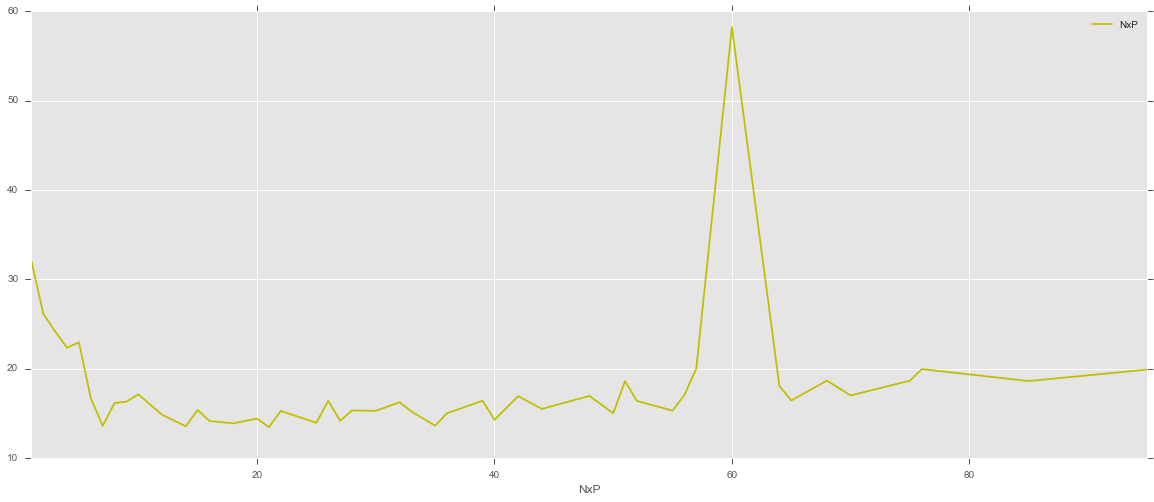

In [110]:
fig, ax = plt.subplots(figsize=(20,8))

df_g[df_g.Delta2 < 80].reset_index().plot(x='NxP', y='Delta2', label='NxP', color='y', ax=ax)

# Analysis and Conclusion

Unfortunately, there is a bug with the version used for gathering the data. The time was not captured well, and there were some missing data points. The bug was found only when doing the report and it became difficult to redo the test at the lab.

However, based on the remaining data that is available, there is improvement at some points.